# Analyse Exploratoire

### Import des modules

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Analyse Exploratoire

In [9]:
building_consumption = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [10]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [11]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [25]:
#Affichage des informations selon le type de variable qualitatives ou quantitaves

for col in building_consumption.columns:
    print(f"### Colonne : {col}\n")
        
    if building_consumption[col].dtype == "object" or str(building_consumption[col].dtype) == "category":
        print("Variable qualitative\n")
        print(building_consumption[col].value_counts(dropna=False))
    else:
        print("Variable quantitative\n")
        print(building_consumption[col].describe())
        
    print("\n" + "-"*50 + "\n")

### Colonne : OSEBuildingID

Variable qualitative

OSEBuildingID
50101    1
50098    1
50095    1
50094    1
50093    1
        ..
8        1
5        1
3        1
2        1
1        1
Name: count, Length: 3376, dtype: int64

--------------------------------------------------

### Colonne : DataYear

Variable qualitative

DataYear
2016    3376
Name: count, dtype: int64

--------------------------------------------------

### Colonne : BuildingType

Variable qualitative

BuildingType
NonResidential          1546
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Campus                    24
Name: count, dtype: int64

--------------------------------------------------

### Colonne : PrimaryPropertyType

Variable qualitative

PrimaryPropertyType
Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large 

In [15]:
#Requalification des variables en quanti/quali

building_consumption["DataYear"] = building_consumption["DataYear"].astype("category")
building_consumption["OSEBuildingID"] = building_consumption["OSEBuildingID"].astype("object")
building_consumption["ZipCode"] = building_consumption["ZipCode"].astype("object")
building_consumption["CouncilDistrictCode"] = building_consumption["CouncilDistrictCode"].astype("object")
building_consumption["Comments"] = building_consumption["Comments"].astype("object")
building_consumption["DefaultData"] = building_consumption["DefaultData"].astype("object")


In [26]:
#Suppression des colonnes inutiles

del building_consumption['Comments']
del building_consumption['DataYear']
del building_consumption['TaxParcelIdentificationNumber']
del building_consumption['City']
del building_consumption['State']

In [17]:
#Nettoyage des données : renommage des données

building_consumption.loc[building_consumption['Neighborhood'] == "Northwest", 'Neighborhood'] = "NORTHWEST"
building_consumption.loc[building_consumption['Neighborhood'] == "North", 'Neighborhood'] = "NORTH"
building_consumption.loc[building_consumption['Neighborhood'] == "Central", 'Neighborhood'] = "CENTRAL"
building_consumption.loc[building_consumption['Neighborhood'] == "Ballard", 'Neighborhood'] = "BALLARD"
building_consumption.loc[building_consumption['Neighborhood'] == "Delridge", 'Neighborhood'] = "DELRIDGE"
building_consumption.loc[building_consumption['Neighborhood'] == "DELRIDGE NEIGHBORHOODS", 'Neighborhood'] = "DELRIDGE"
building_consumption.loc[building_consumption['BuildingType'] == "Nonresidential COS", 'BuildingType'] = "NonResidential"
building_consumption.loc[building_consumption['BuildingType'] == "Nonresidential WA", 'BuildingType'] = "NonResidential"

In [18]:
#suppression de valeurs aberrantes : remplacement par NaN

building_consumption.loc[building_consumption['NumberofFloors'] == 99, 'NumberofFloors'] = np.nan

In [19]:
building_consumption.loc[building_consumption[['PropertyName','Address']].duplicated(keep=False),:]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


In [23]:
building_consumption.loc[building_consumption["DefaultData"] == True,:]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
22,28,2016,SPS-District K-12,K-12 School,Graham Hill Elementary,5149 S. Graham St.,Seattle,WA,98118.0,1102000138,...,2.746059e+05,9.369550e+05,6025.229004,6.025230e+05,True,NaN,Error - Correct Default Data,NaN,38.53,0.69
30,36,2016,SPS-District K-12,K-12 School,Jane Addams Middle,11051 34th Ave. N.E.,Seattle,WA,98125.0,0752000170,...,5.708092e+05,1.947601e+06,48315.718750,4.831572e+06,True,NaN,Error - Correct Default Data,NaN,270.18,1.68
38,51,2016,SPS-District K-12,K-12 School,Eckstein Middle,3003 N.E. 75th St.,Seattle,WA,98115.0,0425049022,...,4.688405e+05,1.599684e+06,47994.433590,4.799443e+06,True,NaN,Error - Correct Default Data,NaN,266.05,1.52
86,125,2016,SPS-District K-12,K-12 School,Mercer International Middle,1600 Columbian Way S.,Seattle,WA,98108.0,1624049214,...,6.631945e+05,2.262820e+06,41932.066410,4.193207e+06,True,NaN,Error - Correct Default Data,NaN,238.48,1.82
87,127,2016,SPS-District K-12,K-12 School,Orca K-8 School,5215 46th Ave. S.,Seattle,WA,98118.0,1704900242,...,4.209894e+05,1.436416e+06,1969.832520,1.969830e+05,True,NaN,Error - Correct Default Data,NaN,20.48,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,29069,2016,Multifamily LR (1-4),Senior Care Community,Lakeshore,11448 Rainier Ave S,Seattle,WA,98178.0,1180001715,...,1.265544e+06,4.318036e+06,24059.349610,2.405935e+06,True,NaN,Error - Correct Default Data,NaN,157.88,1.26
3126,39332,2016,SPS-District K-12,K-12 School,South Shore K-8,4800 S. Henderson,Seattle,WA,98118.0,2123700250,...,8.805380e+05,3.004396e+06,19549.021480,1.954902e+06,True,NaN,Error - Correct Default Data,NaN,124.77,0.90
3366,50210,2016,NonResidential,Office,Central West HQ / Brown Bear,1403 w howe,Seattle,WA,NaN,2425039137,...,1.473235e+05,5.026678e+05,0.000000,0.000000e+00,True,NaN,Error - Correct Default Data,NaN,3.50,0.26
3369,50220,2016,NonResidential,Office,Genesee/SC SE HQ,4420 S Genesee,Seattle,WA,NaN,4154300585,...,8.134140e+04,2.775369e+05,1102.729980,1.102730e+05,True,NaN,Error - Correct Default Data,NaN,7.79,0.51


In [25]:
building_consumption.loc[building_consumption["Outlier"] != "NaN",:]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,CouncilDistrictCode,Neighborhood,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,7,DOWNTOWN,...,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,NaN,249.98,2.83
1,2,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,7,DOWNTOWN,...,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,NaN,295.86,2.86
2,3,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,7,DOWNTOWN,...,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,NaN,2089.28,2.19
3,5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,7,DOWNTOWN,...,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,NaN,286.43,4.67
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,7,DOWNTOWN,...,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,NonResidential,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,2,GREATER DUWAMISH,...,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,NonResidential,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,2,DOWNTOWN,...,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,NaN,32.17,2.01
3373,50224,NonResidential,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,7,MAGNOLIA / QUEEN ANNE,...,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,Compliant,NaN,223.54,16.99
3374,50225,NonResidential,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,1,GREATER DUWAMISH,...,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,Compliant,NaN,22.11,1.57


In [30]:
#Suppression des lignes des batiments uniquement famille

building_type_non_valide = ['Multifamily LR (1-4)','Multifamily MR (5-9)', 'Multifamily HR (10+)'] 
condition_suppression = (building_consumption['BuildingType'].isin(building_type_non_valide)) & (building_consumption['Usage_multiple'] == 'Mono usage')
building_consumption_filtré = building_consumption[~condition_suppression]
print(f"Nombre de lignes restantes : {len(building_consumption_filtré)}")

building_consumption_filtré["BuildingType"].value_counts()

Nombre de lignes restantes : 2506


BuildingType
NonResidential          1546
Multifamily LR (1-4)     417
Multifamily MR (5-9)     345
SPS-District K-12         98
Multifamily HR (10+)      76
Campus                    24
Name: count, dtype: int64

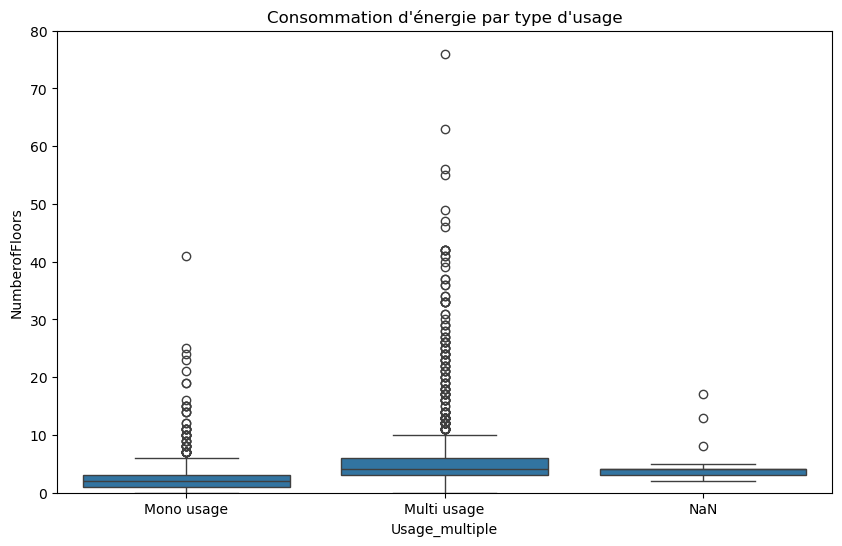

In [31]:
#Visualiation 1

plt.figure(figsize=(10, 6))
sns.boxplot(data=building_consumption_filtré, x="Usage_multiple", y="NumberofFloors")
plt.ylim(0, 80)
plt.title("Consommation d'énergie par type d'usage")
plt.show()

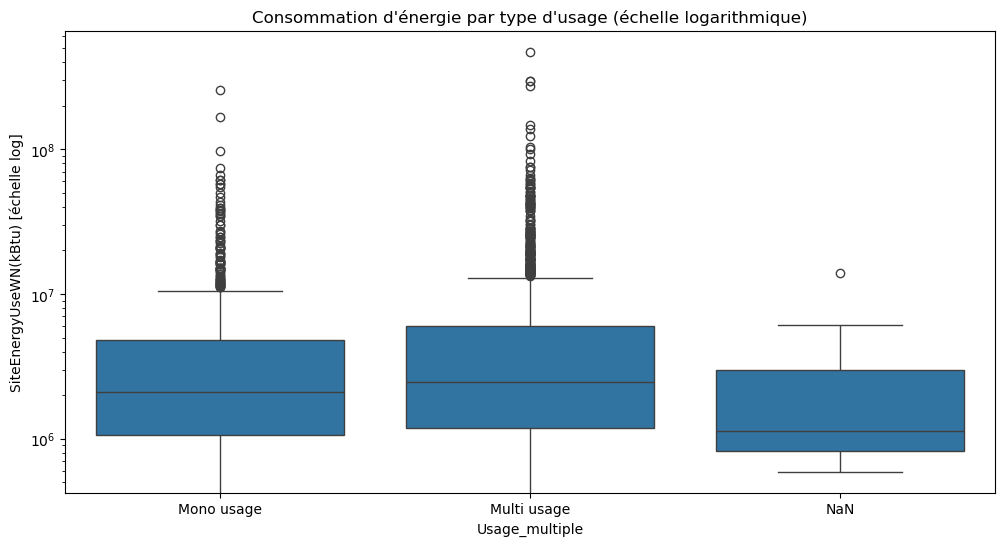

In [32]:
#Visualiation 2

plt.figure(figsize=(12, 6))
sns.boxplot(data=building_consumption_filtré, x="Usage_multiple", y="SiteEnergyUseWN(kBtu)")
plt.yscale("log")  
plt.title("Consommation d'énergie par type d'usage (échelle logarithmique)")
plt.ylabel("SiteEnergyUseWN(kBtu) [échelle log]")
plt.show()

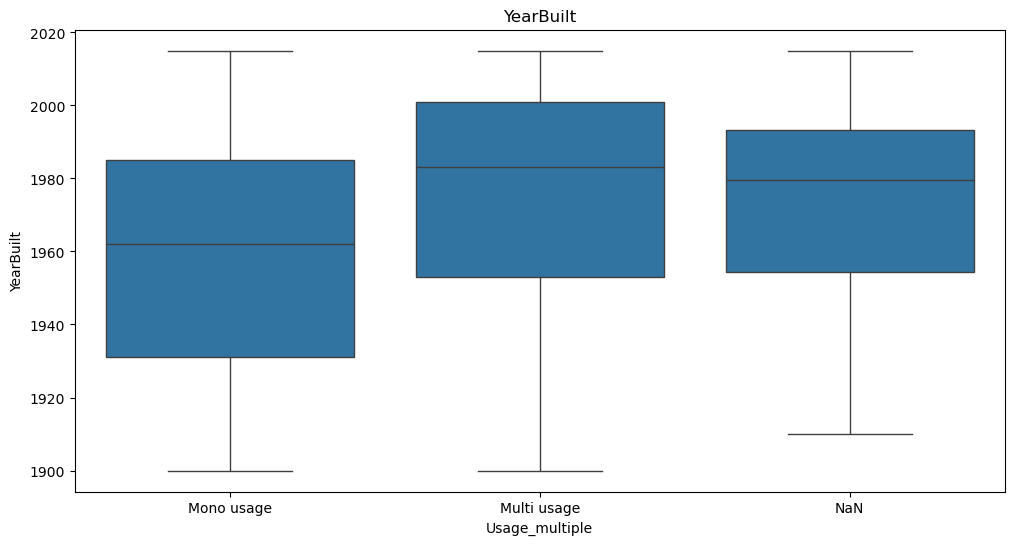

In [33]:
#Visualiation 3

plt.figure(figsize=(12, 6))
sns.boxplot(data=building_consumption_filtré, x="Usage_multiple", y="YearBuilt")
plt.title("YearBuilt")
plt.ylabel("YearBuilt")
plt.show()

In [34]:
#filtre sur les consommations pour enlever les 0

df_filtre_targetsans0 = building_consumption_filtré[building_consumption_filtré["SiteEnergyUse(kBtu)"] > 0]
df_filtre_targetsans0 = df_filtre_targetsans0[df_filtre_targetsans0["TotalGHGEmissions"] > 0]
df_filtre_targetsans0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2478 entries, 0 to 3375
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    2478 non-null   object 
 1   BuildingType                     2478 non-null   object 
 2   PrimaryPropertyType              2478 non-null   object 
 3   PropertyName                     2478 non-null   object 
 4   Address                          2478 non-null   object 
 5   ZipCode                          2462 non-null   object 
 6   CouncilDistrictCode              2478 non-null   object 
 7   Neighborhood                     2478 non-null   object 
 8   Latitude                         2478 non-null   float64
 9   Longitude                        2478 non-null   float64
 10  YearBuilt                        2478 non-null   int64  
 11  NumberofBuildings                2478 non-null   float64
 12  NumberofFloors           

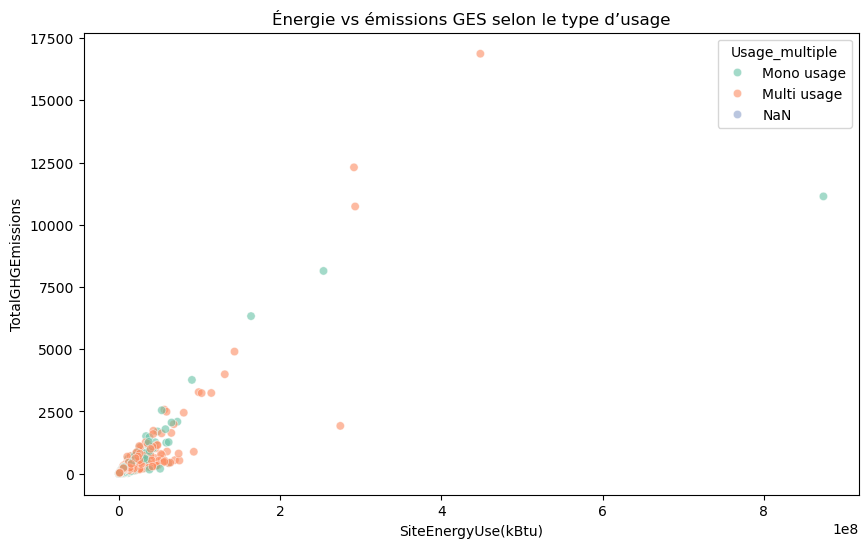

In [35]:
#Visualiation 4 Avec filtre sur les consommations pour enlever les 0

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_filtre_targetsans0,
    x="SiteEnergyUse(kBtu)",
    y="TotalGHGEmissions",
    hue="Usage_multiple",
    palette="Set2",
    alpha=0.6
)

plt.title("Énergie vs émissions GES selon le type d’usage")
plt.xlabel("SiteEnergyUse(kBtu)")
plt.ylabel("TotalGHGEmissions")
plt.show()

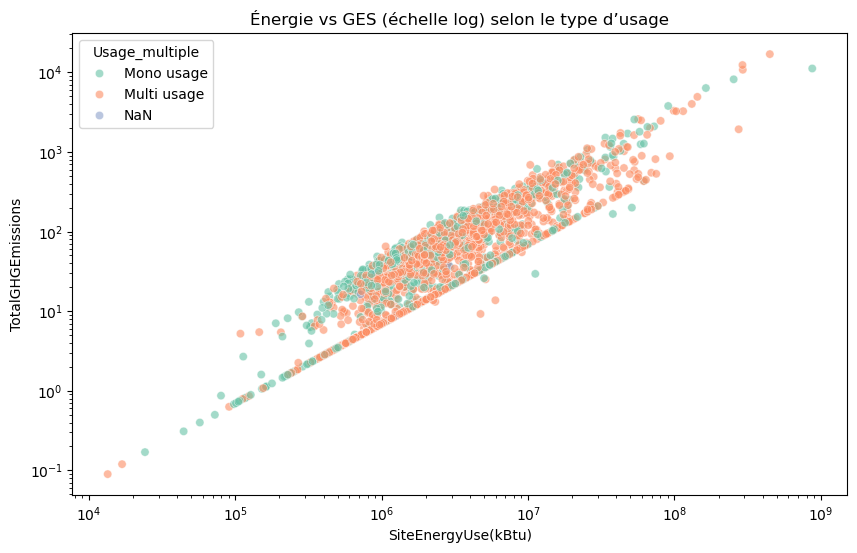

In [36]:
#Visualiation 5 Avec filtre sur les consommations pour enlever les 0

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_filtre_targetsans0,
    x="SiteEnergyUse(kBtu)",
    y="TotalGHGEmissions",
    hue="Usage_multiple",
    palette="Set2",
    alpha=0.6
)

plt.xscale("log")
plt.yscale("log")
plt.title("Énergie vs GES (échelle log) selon le type d’usage")
plt.xlabel("SiteEnergyUse(kBtu)")
plt.ylabel("TotalGHGEmissions")
plt.show()

C:\Users\thoma\AppData\Local\Temp\ipykernel_4192\3706649497.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtre_targetsans0['SiteEnergyUse(kBtu)'])


<Axes: xlabel='SiteEnergyUse(kBtu)', ylabel='Density'>

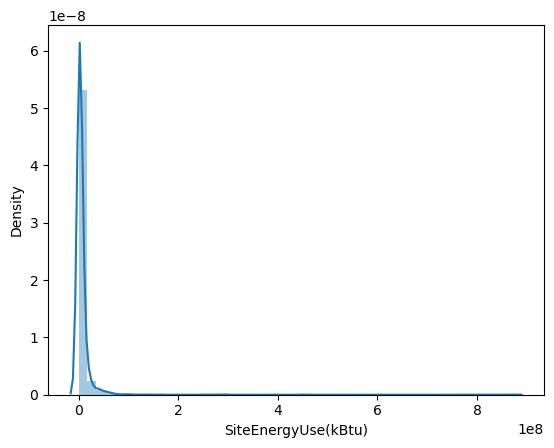

In [37]:
sns.distplot(df_filtre_targetsans0['SiteEnergyUse(kBtu)'])

In [39]:
print("Skewness: %f" % df_filtre_targetsans0['SiteEnergyUse(kBtu)'].skew())
print("Kurtosis: %f" % df_filtre_targetsans0['SiteEnergyUse(kBtu)'].kurt())

Skewness: 21.560047
Kurtosis: 642.627316


#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

Qelques pistes d'analyse : 

* Identifier les colonnes avec une majorité de valeurs manquantes ou constantes en utilisant la méthode value_counts() de Pandas
* Mettre en evidence les différences entre les immeubles mono et multi-usages
* Utiliser des pairplots et des boxplots pour faire ressortir les outliers ou des batiments avec des valeurs peu cohérentes d'un point de vue métier 

Pour vous inspirer, ou comprendre l'esprit recherché dans une analyse exploratoire, vous pouvez consulter ce notebook en ligne : https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python. Il ne s'agit pas d'un modèle à suivre à la lettre ni d'un template d'analyses attendues pour ce projet. 

# Modélisation 

### Import des modules 

In [48]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

En règle générale : On utilise la méthode .apply() de Pandas pour créer une nouvelle colonne à partir d'une colonne existante. N'hésitez pas à regarder les exemples dans les chapitres de cours donnés en ressource

In [ ]:
# CODE FEATURE ENGINEERING

# Si ce n'est pas déjà fait
building_consumption_filtré = building_consumption[~condition_suppression].copy()

# Création des colonnes booléennes
building_consumption_filtré['Conso_gaz_mesure'] = (building_consumption_filtré['NaturalGas(therms)'] != 0).astype(int)
building_consumption_filtré['Conso_elec_mesure'] = (building_consumption_filtré['Electricity(kWh)'] != 0).astype(int)
building_consumption_filtré['Emission_steam_mesure'] = (building_consumption_filtré['SteamUse(kBtu)'] != 0).astype(int)

building_consumption_filtré.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,...,NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Usage_multiple,Conso_gaz_mesure,Conso_elec_mesure,Emission_steam_mesure
0,1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101.0,7,DOWNTOWN,47.61220,-122.33799,...,1276453.0,False,Compliant,NaN,249.98,2.83,Mono usage,1,1,1
1,2,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101.0,7,DOWNTOWN,47.61317,-122.33393,...,5145082.0,False,Compliant,NaN,295.86,2.86,Multi usage,1,1,0
2,3,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,7,DOWNTOWN,47.61393,-122.33810,...,1493800.0,False,Compliant,NaN,2089.28,2.19,Mono usage,1,1,1
3,5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,7,DOWNTOWN,47.61412,-122.33664,...,1811213.0,False,Compliant,NaN,286.43,4.67,Mono usage,1,1,1
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,7,DOWNTOWN,47.61375,-122.34047,...,8803998.0,False,Compliant,NaN,505.01,2.88,Multi usage,1,1,0


In [45]:
#Creation de nouvelles features pour regrouper le mono et multi usage 

def Multi_usage(row):
    if pd.isna(row["LargestPropertyUseType"]) and pd.isna(row["SecondLargestPropertyUseType"]) and pd.isna(row["ThirdLargestPropertyUseType"]):
        return "NaN"
    elif pd.notna(row["LargestPropertyUseType"]) and pd.isna(row["SecondLargestPropertyUseType"]) and pd.isna(row["ThirdLargestPropertyUseType"]):
        return "Mono usage"
    else:
        return "Multi usage"

building_consumption["Usage_multiple"] = building_consumption.apply(Multi_usage, axis=1)
building_consumption_filtré["Usage_multiple"] = building_consumption_filtré.apply(Multi_usage, axis=1)

In [56]:
def Categorie_anne_construction(year):
    if year < 1975:
        return "Avant 1975"
    elif year < 2000:
        return "1975–1999"
    elif year < 2010:
        return "IECC 2000–2009"
    elif year < 2020:
        return "IECC 2012–2018"
    elif year < 2024:
        return "IECC 2021"
    else:
        return "IECC 2024+"

building_consumption_filtré['Groupe_anne_construction'] = building_consumption_filtré['YearBuilt'].apply(Categorie_anne_construction)
building_consumption_filtré.head()

,OSEBuildingID,PrimaryPropertyType,PropertyName,Address,ZipCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,...,BuildingType_NonResidential,BuildingType_SPS-District K-12,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7,Groupe_anne_construction
0,1,Hotel,Mayflower park hotel,405 Olive way,98101.0,DOWNTOWN,47.61220,-122.33799,1927,1.0,...,True,False,False,False,False,False,False,False,True,Avant 1975
1,2,Hotel,Paramount Hotel,724 Pine street,98101.0,DOWNTOWN,47.61317,-122.33393,1996,1.0,...,True,False,False,False,False,False,False,False,True,1975–1999
2,3,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,DOWNTOWN,47.61393,-122.33810,1969,1.0,...,True,False,False,False,False,False,False,False,True,Avant 1975
3,5,Hotel,HOTEL MAX,620 STEWART ST,98101.0,DOWNTOWN,47.61412,-122.33664,1926,1.0,...,True,False,False,False,False,False,False,False,True,Avant 1975
4,8,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,DOWNTOWN,47.61375,-122.34047,1980,1.0,...,True,False,False,False,False,False,False,False,True,1975–1999


In [ ]:
#One hot encoding sur les variables d'interêts

building_consumption_filtré = pd.get_dummies(
    building_consumption_filtré, 
    columns=["BuildingType"], 
    drop_first=False  
)

KeyError: "None of [Index(['BuildingType'], dtype='object')] are in the [columns]"

In [52]:
building_consumption_filtré = pd.get_dummies(
    building_consumption_filtré, 
    columns=["CouncilDistrictCode"], 
    drop_first=False  
)

In [53]:
building_consumption_filtré.head()

,OSEBuildingID,PrimaryPropertyType,PropertyName,Address,ZipCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,...,BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_SPS-District K-12,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7
0,1,Hotel,Mayflower park hotel,405 Olive way,98101.0,DOWNTOWN,47.61220,-122.33799,1927,1.0,...,False,True,False,False,False,False,False,False,False,True
1,2,Hotel,Paramount Hotel,724 Pine street,98101.0,DOWNTOWN,47.61317,-122.33393,1996,1.0,...,False,True,False,False,False,False,False,False,False,True
2,3,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,DOWNTOWN,47.61393,-122.33810,1969,1.0,...,False,True,False,False,False,False,False,False,False,True
3,5,Hotel,HOTEL MAX,620 STEWART ST,98101.0,DOWNTOWN,47.61412,-122.33664,1926,1.0,...,False,True,False,False,False,False,False,False,False,True
4,8,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,DOWNTOWN,47.61375,-122.34047,1980,1.0,...,False,True,False,False,False,False,False,False,False,True


### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn 
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder

In [ ]:
# CODE PREPARATION DES FEATURES

### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [1]:
# CODE COMPARAISON DES MODELES

### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn.

In [ ]:
# CODE OPTIMISATION ET INTERPRETATION DU MODELE